# Trabajo TEMA - 1 - Aplicaciones de la Simulación
## Alfonso Aguilar Aguirre y Pablo Ángel Mendoza Aguirre
#### 17/septiembre/2018

## Problema 1

1. Un juego de lanzamiento de una moneda: Eres el afortunado ganador de un concurso de sorteos. Su premio es unas vacaciones con todos los gastos pagados en un hotel importante en Las Vegas, incluyendo algunas fichas para apostar en el casino del hotel. Al ingresar al casino, descubres que, adem ́as de los juegos habituales (blackjack, ruleta, etc.), ofrecen un nuevo juego interesante con las siguientes reglas. Reglas del juego.
> 1. Cada jugada del juego consiste en lanzar repetidamente una moneda imparcial hasta que la diferencia entre el número de caras lanzadas y el número de sellos es 3.
> 2. Si decides jugar el juego, debes pagar 1 dólar por cada lanzamiento de la moneda. No puedes salir durante una jugada del juego.
> 3. Usted recibe 8 dólares al final de cada uno de los juego. Por lo tanto, ganas dinero si el número de lanzamientos requeridos es menor a 8, pero pierdes dinero si se requieren más de 8 lanzamientos. 

In [113]:
# Librerías
import time
import random
import itertools
import numpy as np
import pandas as pd
from scipy import stats
#from random import randint
from functools import reduce
import matplotlib.pyplot as plt 

In [125]:
def Jugada(CT:'Costo por lanzamiento',diff:'Diferencia máxima entre caras y sellos',CI:'Capital inicial'):
    '''Esta función representa una jugada de monedas, donde se lanza una moneda hasta que la diferencia de caras y ellos de un cierto valor. La función recibe el costo por cada lanzamiento, el beneficio del jugador al terminar la jugada y la diferencia máxima entre caras y sellos que limita el juego y da como resultado la cantidad de veces que se lazó la moneda y la ganancia o pérdida del jugador.'''
    N = 1000 #numero maximo de lanzamientos de la funcion
    x0 = 0  #pocision inicial
    z = np.zeros(N) #vector de ceros que almacena los resultados (cara o sello)
    z[0] = x0; #posicion inicial
    z[1:] = np.random.choice([-1,1],N-1) #lanzamientos
    x = reduce(lambda z1,z2: z1+z2,z) # diferencia entre caras y sellos
    xx = [x0] # balance inicial de lanzamientos
    [xx.append(xx[-1]+z[i+1]) for i in range(N-1)] # balance acumulado de lanzamientos
    xx2=[] # lista con los tiros hasta que la diferencia de tiros es de 3
    for i in range(N-1):
        if np.abs(xx[i])<3:
            xx2.append(xx[i])
        else:
            xx2.append(xx[i])
            break
    tiros = len(xx2)-1 #cantidad de tiros de la jugada
    #RESULTADOS DE LA JUGADA
    dp = CT*tiros #dinero pagado
    bal = CI-dp # balance final de la jugada
    return tiros,bal

> 1. ¿Cúal es el promedio de tiradas hasta que termina un juego? ¿Cúal es su desviacíon estándar? (dibuja su histograma).

1.1- El promedio de tiros en una jugada es de:  8.892
1.2- La desviación estándar de tiros en una jugada es de:  6.9053845656849555


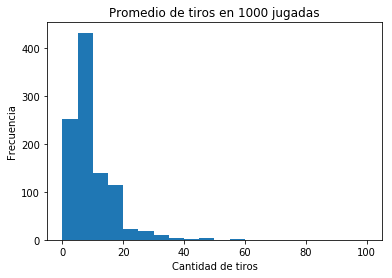

In [126]:
#Juego 1
n = 1000 #cantidad de veces que se apuesta
balgfinal = [] #balance general al terminar las jugadas
balfinal = [] #balance al terminar las jugadas
tirosfinal = [] #tiros de las jugadas
for i in range(n):
    tiros,bal = Jugada(1,3,30) #funcion jugada apostando 1 peso,
    tirosfinal.append(tiros)
    balfinal.append(bal)
print('1.1- El promedio de tiros en una jugada es de: ', np.mean(tirosfinal))
print('1.2- La desviación estándar de tiros en una jugada es de: ', np.std(tirosfinal))
plt.hist(tirosfinal,bins = 20, range=[0,100])
plt.xlabel('Cantidad de tiros')
plt.ylabel('Frecuencia')
plt.title('Promedio de tiros en %i jugadas' %n)
plt.show()

> 2. Para el inciso anterior ¿Cúal es la probabilidad de que tires más de 10 veces para terminar un juego? ¿ y de que tires menos de 5 veces?.




In [119]:
probup10 = len(list(filter(lambda x: x>10,tirosfinal)))/len(tirosfinal)
probdown5 = len(list(filter(lambda x: x<5,tirosfinal)))/len(tirosfinal)
#probdown10 = len(list(filter(lambda x: x<=10,tirosfinal)))/len(tirosfinal)

print('2.1- La probabilidad para tirar más de 10 veces es: ', probup10)
print('2.2- La probabilidad para tirar menos de 5 veces es: ', probdown5 )

2.1- La probabilidad para tirar más de 10 veces es:  0.312
2.2- La probabilidad para tirar menos de 5 veces es:  0.246


> 3. Imagina que lanzas 100 tiros exactos la moneda. ¿Cúal es tu valor esperado de dinero ganado/perdido? ¿Y tu valor más probable?¿Cúal es la probabilidad de ganar dinero? (Grafica el histograma de simulaciones).


El valor esperado de dinero ganado/perdido es :  -12.38
El valor más probable es :  [-13.]
La probabilidad de ganar dinero es:  0.311


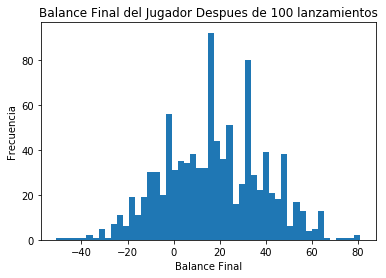

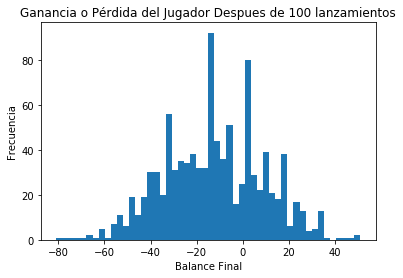

In [120]:
sim = 1000 #cantidad de simulaciones
max_tir = 100 #lanzamientos máximos
bal_ini = 30 # Capital Inicial
a = [] #vector para guardar balances finales depues de 100 lanzamientos
bal = bal_ini #se inicia con un capital inicial(se repite por facilidad en el ciclo)
for j in range(sim+1): #simulara el juego "sim" veces
    a.append(bal) #Aqui se guarda el balance despues de 100 lanzamientos
    bal = 30 #capital inicial
    tir = 0 #tiros iniciales
    while tir <= max_tir: #ciclo que termia el juego depues de 100 lanzamientos
        tiros,bal = Jugada(1, 3, bal) #la jugada
        tir+=tiros #almacena el número de tiros
        bal += 8 #Recompenza al final de la jugada
b = a[1:] #elimina el primer balance que no es un resultado real de juego
c = np.ones(len(b))*bal_ini #Vector de capital inicial para hacer ganancias/perdidas absolutas
d = b-c #Ganancias/Perdidas en absoluto

PL = np.mean(d) #Promedio de Ganancias/Perdidas
MP = stats.mode(d) #El valor más probable
Ganador = len(list(filter(lambda x: x>0,d)))/len(d) #Probabilidad de Ganar
print('El valor esperado de dinero ganado/perdido es : ', PL)
print('El valor más probable es : ', MP[0])
print('La probabilidad de ganar dinero es: ', Ganador)
#Grafica Balance Final del Jugador Despues de 100 lanzamientos
plt.hist(b,bins = 50)
plt.title('Balance Final del Jugador Despues de 100 lanzamientos')
plt.xlabel('Balance Final')
plt.ylabel('Frecuencia')
plt.show()
#Grafica Ganancia o Pérdida del Jugador Despues de 100 lanzamientos
plt.hist(d,bins = 50)
plt.title('Ganancia o Pérdida del Jugador Despues de 100 lanzamientos')
plt.xlabel('Balance Final')
plt.ylabel('Frecuencia')
plt.show()

> 4. Imagina que comienzas con 30 dólares ¿Cúal es el valor esperado del número de tiradas que debes realizar antes de quedarte sin dinero? ¿Cúal es la probabilidad de realizar más de 150 tiradas? (grafica el histograma correspondiente).

El valor esperado del número de tiradas que debes realizar antes de quedarte sin dinero es:  326.913
La probabilidad de realizar más de 150 tiradas es:  0.681


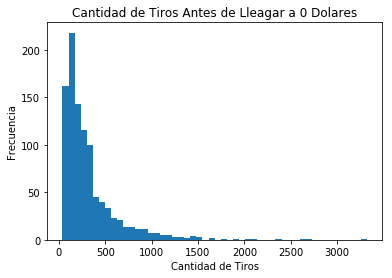

In [121]:
sim = 1000 #cantidad de simulaciones
min_bal = 0 #dinero Minimo que se quiere
bal_ini = 30 # Capital Inicial
a = [] #vector para guardar los lanzaminetos hasta llega a 0 dolaress
tir = 0 #se inicia con ciertos tiros (se repite por facilidad en el ciclo)
for j in range(sim+1): #simulara el juego "sim" veces
    a.append(tir) #Aqui se guarda los tiros hasta llegar a 0 dolares
    bal = 30 #capital inicial
    tir = 0 #tiros iniciales
    while bal > min_bal: #ciclo que termia el juego llegando a 0 dolares
        tiros,bal = Jugada(1, 3, bal) #la jugada
        tir+=tiros #almacena el número de tiros
        bal += 8 #Recompenza al final de la jugada
b = a[1:] #elimina el primer numero de tiros que no es un resultado real de juego
tir_prom = np.mean(b)#promedio de tiros antes de llegar a 0 dolares
m_150 = len(list(filter(lambda x: x>150,b)))/len(b) #Probabilidad mas de 150 tiradas antes de llegar a 0 dolares

print('El valor esperado del número de tiradas que debes realizar antes de quedarte sin dinero es: ',tir_prom)
print('La probabilidad de realizar más de 150 tiradas es: ',m_150)

#Grafica Cantidad de Tiros Antes de Lleagar a 0 Dolares
plt.hist(b,bins = 50)
plt.title('Cantidad de Tiros Antes de Lleagar a 0 Dolares')
plt.xlabel('Cantidad de Tiros')
plt.ylabel('Frecuencia')
plt.show()

## Problema 2

2. Jessica Williams, gerente de Kitchen Appliances para Midtown Department Store, siente que sus niveles de inventario de estufas han estado funcionando más de lo necesario. Antes de revisar la política de inventario de estufas, registra el número vendido cada día durante un periodo de 25 días, como se resume a continuación.

In [54]:
d = {'Maquinas Vendidas': [2,3,4,5,6], 'Número de Días': [4,7,8,5,1]}
>>> df = pd.DataFrame(data=d).T
>>> df

,0,1,2,3,4
Maquinas Vendidas,2,3,4,5,6
Número de Días,4,7,8,5,1


Graficar el histograma y calcular el promedio de ventas usando python y la fórmula teórica de valor esperado.

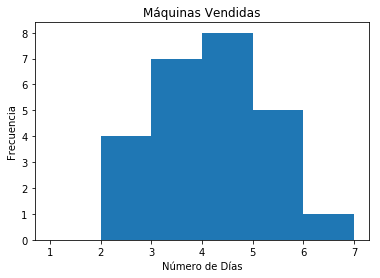

El promedio de ventas de estufas usando la fórmula teórica de valor esperado es:
3.6800000000000006


In [65]:
dias = [4,7,8,5,1]
maqven =[2,3,4,5,6]
prob= list(dias/np.sum(dias))
mult = list(map(lambda x,y: x*y,prob,maqven ))
prom = np.sum(mult)
plt.hist(maqven,bins = 6, range=[1,7], weights=dias)
plt.xlabel('Número de Días')
plt.ylabel('Frecuencia')
plt.title('Máquinas Vendidas')
plt.show()
print('El promedio de ventas de estufas usando la fórmula teórica de valor esperado es:')
print(prom)


## Problema 3

3. Rustbelt Manufacturing Company emplea un equipo de mantenimiento para reparar sus máquinas según sea necesario. La gerencia ahora quiere un estudio de simulación para analizar cúal debe ser el tamaño de la tripulación, donde los tamaños de la cuadrilla considerados son 2, 3 y 4. El tiempo requerido por la cuadrilla para reparar una máquina tiene una distribución uniforme durante el intervalo de 0 a dos veces la media, donde la media depende del tamaño de la cuadrilla. La media es de 4 horas con dos miembros de la cuadrilla, 3 horas con tres miembros de la cuadrilla y 2 horas con cuatro miembros de la cuadrilla. El tiempo entre las interrupciones de alguna máquina tiene una distribución uniforme de entre 3.5 y 9 horas. Cuando una máquina se descompone y por lo tanto requiere reparación, la gerencia desea realizar los siguientes análisis:

> Nota: Se quiere analizar el tiempo de espera de una máquina descompuesta, por lo tanto se tienen que analizar los tiempos de reparación y los tiempos de descomposición y ver si cuando se daña una nueva máquina todavía están reparando una máquina anterior o ya la repararon.

In [67]:
cuad = [2,3,4] #tamaño de cuadrillas
media = [4,3,2] #media de cuadrillas

### Método Congruencial
def met_cong(x0:"Semilla inicial",a:"Multiplicador",b:"Incremento", m:"Módulo", n:"Número de elementos"):
    '''Esta función contiene la programación del método congruencial para la sucesión x_n = (ax_{n−1} + b) mod m'''
    N = np.arange(n)
    return ((a**N * x0 + b * ((a**N-1)/(a-1))) % m)/m
###Distribución Uniforme Aleatoria Entre 2 Valores
def rand_uni_bet(n:"Cantidad de números aleatorios deseados",a:"límite inferior",b:"límite inferior"):
    '''Esta función genera "n" números aleatorios distribuidos de forma uniforme entre 2 números dados'''
    x = met_cong(round(time.time()*10**7), 1103515245, 12345, 2**31-1, n+1)[1:]
    xab = (b-a)*x+a #Desplazamiento de números aleatorios
    return xab

In [92]:
sim = 100000 #simulaciones
### Distribuciones
#Distribución de tiempo requerido por la cuadrilla 1 para reparar una máquina
cuad1 = rand_uni_bet(sim,0,2*media[0])#Generación de (n) números aleatorios entre 0 y 2 veces la media de la cuadrilla 1
#Distribución de tiempo requerido por la cuadrilla 2 para reparar una máquina
cuad2 = rand_uni_bet(sim,0,2*media[1])#Generación de (n) números aleatorios entre 0 y 2 veces la media de la cuadrilla 2
#Distribución de tiempo requerido por la cuadrilla 3 para reparar una máquina
cuad3 = rand_uni_bet(sim,0,2*media[2])#Generación de (n) números aleatorios entre 0 y 2 veces la media de la cuadrilla 3
#Distribución de las interrupciones de alguna máquina
distr_interrupt = rand_uni_bet(100000,3.5,9)#Generación de (n) números aleatorios entre 3.5 y 9

> 1. Comienza con una cuadrilla de tamaño 2, ¿Cúal es el tiempo medio de espera para reparar la máquina?, ¿Cúal es la probabilidad de que una máquina tenga que esperar más de 8 horas para ser reparada? (dibuja el histograma correspondiente).

La probabilidad de que una máquina tenga que esperar más de 8 horas para ser reparada por una cuadrilla de 2 personas es:  0.00205


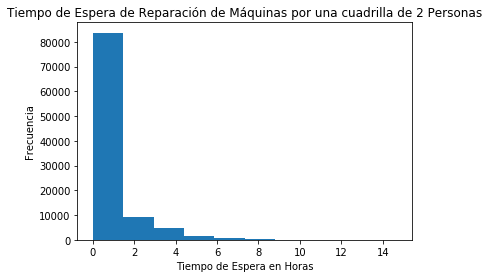

In [100]:
t_esp = [cuad1[0]] #vector para ingresar tiempo de espera
tempcuad = cuad1[0] #se inicializa con el tiempo de reparar la primera maquina
for j in range(sim-1): #ciclo con simulaciones
    tempcuad += cuad1[j+1] - distr_interrupt[j] #se suman los tiempos de espera
    if tempcuad <= 0: # si el tiempo de espera es negativo, se vuelve 0
        tempcuad = 0
        t_esp.append(tempcuad) #se agrega al vector de tiempo de espera
    else:
        t_esp.append(tempcuad)#se agrega al vector de tiempo de espera
t_esp_prom = np.mean(t_esp)#promedio de tiempo de espera
t_esp_sup8 = len(list(filter(lambda x: x>8,t_esp)))/len(t_esp)#tiempo de espera superior a 8
print('La probabilidad de que una máquina tenga que esperar más de 8 horas para ser reparada por una cuadrilla de 2 personas es: ',t_esp_sup8)
plt.hist(t_esp)
plt.xlabel('Tiempo de Espera en Horas')
plt.ylabel('Frecuencia')
plt.title('Tiempo de Espera de Reparación de Máquinas por una cuadrilla de 2 Personas')
plt.show()

> 2. Repita el inciso 1 pero para una cuadrilla de tamaño 3, ¿Cúal es el tiempo medio de espera para reparar la máquina?, ¿Cúal es la probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada? (dibuja el histograma correspondiente).

La probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada por una cuadrilla de 3 personas es:  0.00082


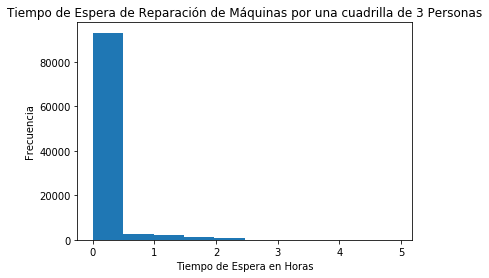

In [95]:
t_esp = [cuad2[0]]
tempcuad = cuad2[0]
for j in range(sim-1):
    tempcuad += cuad2[j+1] - distr_interrupt[j]
    if tempcuad <= 0:
        tempcuad = 0
        t_esp.append(tempcuad)
    else:
        t_esp.append(tempcuad)
t_esp_prom = np.mean(t_esp)
t_esp_sup3 = len(list(filter(lambda x: x>3,t_esp)))/len(t_esp)
print('La probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada por una cuadrilla de 3 personas es: ',t_esp_sup3)
plt.hist(t_esp)
plt.xlabel('Tiempo de Espera en Horas')
plt.ylabel('Frecuencia')
plt.title('Tiempo de Espera de Reparación de Máquinas por una cuadrilla de 3 Personas')
plt.show()

> 3. Repita el inciso 2 para una cuadrilla de tamaño 4, Cúal es el tiempo medio de espera para reparar la máquina?, ¿Cúal es la probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada? (dibuja el histograma correspondiente).

In [ ]:
t_esp = [cuad3[0]]
tempcuad = cuad3[0]
for j in range(sim-1):
    tempcuad += cuad3[j+1] - distr_interrupt[j]
    if tempcuad <= 0:
        tempcuad = 0
        t_esp.append(tempcuad)
    else:
        t_esp.append(tempcuad)
t_esp_prom = np.mean(t_esp)
t_esp_sup3 = len(list(filter(lambda x: x>3,t_esp)))/len(t_esp)
print('La probabilidad de que una máquina tenga que esperar más de 3 horas para ser reparada por una cuadrilla de 4 personas es: ',t_esp_sup3)
plt.hist(t_esp)
plt.xlabel('Tiempo de Espera en Horas')
plt.ylabel('Frecuencia')
plt.title('Tiempo de Espera de Reparación de Máquinas por una cuadrilla de 4 Personas')
plt.show()

## Problema 4

4. El juego de dados requiere que el jugador arroje dos dados una o más veces hasta que se llegue a una decisión sobre si él (o ella) gana o pierde. Él gana si la primera tirada resulta en una suma de 7 u 11 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y la misma suma reaparece antes de que aparezca una suma de 7. Por el contrario, pierde si la primera tirada resulta en una suma de 2, 3 o 12 o, alternativamente, si la primera suma es 4, 5, 6, 8, 9 o 10 y aparece una suma de 7 antes de la primera suma reaparece.

In [104]:
def dados():
    '''Esta funcion es la encargada de realizar el lanzamiento de los dados y regresar la suma'''
    dado1=random.randint(1,6)
    dado2=random.randint(1,6)
    return dado1+dado2

def game(status:"Estatus del lanzamiento"):
    '''Esta funcion es la encargada de regresar el resultado de un juego completo'''
    won=False
    status2=0
    if status==7 or status==11:
        won=True
    else:
        if status>=4 and status<=10:
            status2=dados()
            if status2==7:
                won=False
            else:
                while status2!=7 and won!=True:
                    if status==status2:
                        won=True
                    else:
                        status2=dados()
    return won,status,status2

def bet(cash:"Cantidad de dinero inicial",Bet:"Cantidad de dinero a apostar",ngames:"Numero de veces que se jugara"):
    '''Esta funcion es la encargada de realizar la apuesta completa para un jugador con su
    capital y la cantidad que apostara'''
    cash=[cash]
    x=list(map(lambda n:cash.append(Bet) if(game(dados())[0]) else cash.append(-Bet),range(ngames)))
    return sum(cash)

> 1. Calcule la probabilidad de ganar corriendo 10,000 simulaciones.

In [105]:
N = 10000
x=[1 for i in range(N) if game(dados())[0]]
prob=sum(x)/10000
print("Jugando 10000 veces la probabilidad de ganar es de:",prob)

Jugando 10000 veces la probabilidad de ganar es de: 0.4846


> 2. Imagina que cada juego ganas o pierdes 50 dolares. Si inicias con 500 dolares. ¿Cúal es tu valor esperado de dinero después de 10 juegos? ¿y el más probable? ¿Cúal es la probabilidad de ganar dinero?.

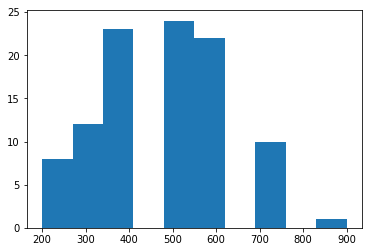

media:  475.0

probabilidad de ganar dinero despues de jugar  10  juegos: 0.57


In [106]:
iterations=100
money=500
pot=50
ng=10
x=(list(map(lambda n:bet(money,pot,ng),np.arange(iterations))))
plt.hist(x)
plt.show()
print("media: ",np.mean(x))
result=list(filter(lambda x:x>=money,x))
print("\nprobabilidad de ganar dinero despues de jugar ",ng," juegos:",np.size(result)/iterations)

En promedio mi dinero fue: 241.33333333333334


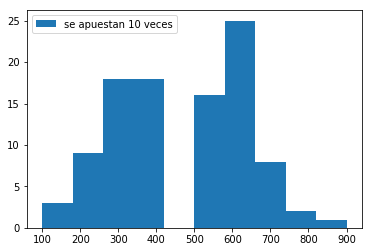

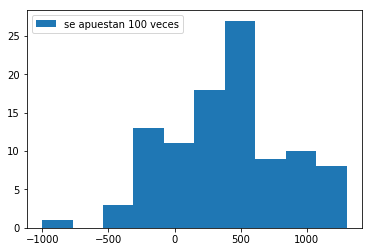

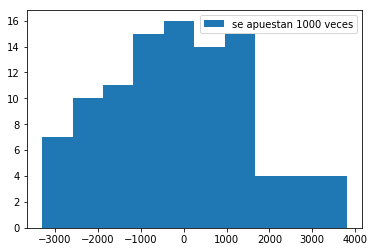

In [107]:
plays=[10,100,1000]
x=list(map(lambda y:(list(map(lambda n:bet(money,pot,y),np.arange(iterations)))),plays))
i=1
final=[]
plays=[10,100,1000]
money=500
pot=50
for j in plays:
    x=(list(map(lambda n:bet(money,pot,j),np.arange(iterations))))
    final.append(x)
    plt.figure(i)
    plt.hist(x,label= 'se apuestan %i veces' %j)
    plt.legend()
    i += 1
print('En promedio mi dinero fue:',np.mean(final))
plt.show()

## Problema 5

5. Una inversión en cetes actualmente promete un rendimiento que va entre el 8 % y el 12 % anual.

In [123]:
def rate():
    '''Funcion encargada de generar tasas de interes aleatorias en el rango para el ejercicio'''
    return random.uniform(.08, .121)
def investment(money:"Cantidad a invertir",interest:"Tasa de interes",time:"Tiempo de la inversion en años"):
    '''Funcion encargada de realizar el calculo del valor futuro con un interes compuesto'''
    return money*(1+interest)**time

> 1. Considera la cantidad total de dinero que obtendrás al final del año dado una inversión inicial de 300000 dolares. Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y grafica su histograma.

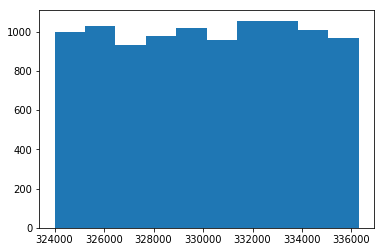

Media de los escenarios:  330168.74620548566

Desviacion estandar de los escenarios 3543.765973717585


In [124]:
money=300000
investments=list(map(lambda n:investment(money,n,1),list(map(lambda y:rate(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))

> 2. Ahora supón que dejas el dinero durante 6 años, Realiza un programa que simule 10,000 escenarios diferentes que puedan suceder, calcula su media, su desviación estándar y grafica su histograma. ¿Cúal es la probabilidad de ganar m ́as de 58000 dolares? ¿Cúal es la probabilidad de ganar menos de 55000 dolares?.

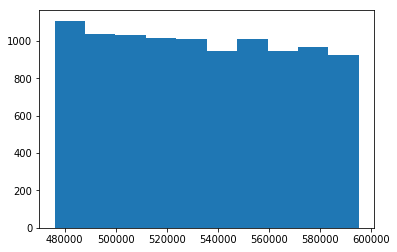

Media de los escenarios:  534084.0620377332

Desviacion estandar de los escenarios 34495.26704296807
Probabilidad de ganar mas de 580,000:  0.1221 
Probabilidad de ganar menos de 550,000:  0.6374


In [111]:
investments=list(map(lambda n:investment(money,n,6),list(map(lambda y:rate(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))
lower=np.size(list(filter(lambda investments:investments<=550000,investments)))/10000
higher=np.size(list(filter(lambda investments:investments>=580000,investments)))/10000
print("Probabilidad de ganar mas de 580,000: ",higher,"\nProbabilidad de ganar menos de 550,000: ",lower)

> 3. Repite el inciso b), pero suponiendo que el rendimiento es discreto, es decir, solo puede tomar los valores enteros 8,9,10,11,12. ¿Cúal es la probabilidad de ganar entre 53000 dolares y 56000 dolares?

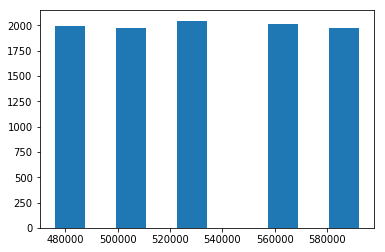

Media de los escenarios:  532787.4454692442

Desviacion estandar de los escenarios 40881.66104059055
Probabilidad de ganar mas de 530,000 y menos de 560,000:  0.2047


In [112]:
def rate_dis():
    '''Funcion encargada de generar numeros aleatorios discretos'''
    return np.random.randint(8,13)/100

investments=list(map(lambda n:investment(money,n,6),list(map(lambda y:rate_dis(),range(10000)))))
plt.hist(investments)
plt.show()
print("Media de los escenarios: ",np.mean(investments))
print("\nDesviacion estandar de los escenarios",np.std(investments))
prob=np.size(list(filter(lambda investments:investments<=560000 and investments>=530000 ,investments)))/10000
print("Probabilidad de ganar mas de 530,000 y menos de 560,000: ",prob)